<a href="https://colab.research.google.com/github/obasekore/AI-bootCamp/blob/main/Rice_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#@title Import packages
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.model_selection import cross_val_score, KFold

In [47]:
#@title Load Data
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv")

In [48]:
#@title Preview Data
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,Cammeo
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,Cammeo
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,Cammeo
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,Cammeo


In [49]:
#@title Simple Statistics of Data
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [50]:
#@title Extract Classes
rice_classes = df['Class'].unique()
classes = {unique_class:id for id, unique_class in enumerate(rice_classes)}
print(classes)

{'Cammeo': 0, 'Osmancik': 1}


In [51]:
#@title Transform
df['Class'] = df['Class'].map(classes)
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,0
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,0
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,0
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,0
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,0


In [52]:
#@title Split Data
train_dataset, test_dataset = train_test_split(df, test_size=0.1)
X_train = train_dataset.drop('Class', axis=1)
y_train = train_dataset['Class']
X_test = test_dataset.drop('Class', axis=1)
y_test = test_dataset['Class']

In [7]:
#@title Normalized Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#@title Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#@title Train Model with Cross Validation
model = LogisticRegressionCV(cv=5).fit(X_train, y_train)

In [20]:
#@title Test Model
y_pred = model.predict(X_test)

In [21]:
#@title Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9291338582677166


In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[139  10]
 [ 17 215]]


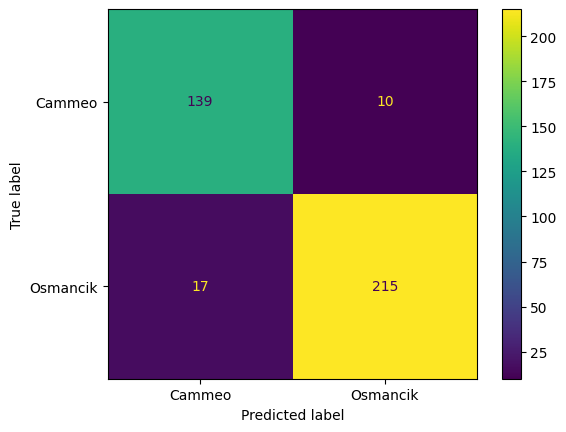

In [53]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
cm_display.plot()

In [22]:
#@title Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", scores)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.9212828  0.93148688 0.93586006 0.94606414 0.91678832]
